In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
from IPython.display import Image 
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import team36
from team36.mnist.vgg import VGG
from team36.attacks.fast_gradient_attack_data_set import FastSignGradientAttackDataSet
from team36.defenses.fast_gradient_sign_method_loss import FastGradientSignMethodLoss
from team36.training import validate, accuracy, predict

DIR = '.'
DATA_DIR = f'{DIR}/data'

In [4]:
model = VGG(image_size=32, in_channels=3)
state_dict = torch.load(f"{DIR}/checkpoints/cifar10-vgg.pth", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

# defense_model = VGG()
# state_dict = torch.load(f"{DIR}/checkpoints/mnist-vgg-defense.pth", map_location=torch.device('cpu'))
# defense_model.load_state_dict(state_dict)

criterion = nn.CrossEntropyLoss()

# fgsm_reg_defense_model = VGG()
# state_dict = torch.load(f"{DIR}/checkpoints/mnist-vgg-fgsm-reg-defense.pth", 
#                         map_location=torch.device('cpu'))
# fgsm_reg_defense_model.load_state_dict(state_dict)

# fgsm_reg_defense_criterion = FastGradientSignMethodLoss(model, nn.CrossEntropyLoss(), 
#                                                         alpha=0.5, epsilon=0.25)

In [5]:
test_set = torchvision.datasets.CIFAR10(root=DATA_DIR, train=False, download=True, 
                                        transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False, num_workers=2)

test_accuracy, _, test_loss = validate(None, test_loader, model, criterion)
# defense_test_accuracy, _, defense_test_loss = validate(None, test_loader, defense_model, criterion)
# fgsm_reg_defense_test_accuracy, _, fgsm_reg_defense_test_loss = validate(None, test_loader,
#                                                                          fgsm_reg_defense_model, 
#                                                                          fgsm_reg_defense_criterion,
#                                                                          no_grad=False)

print(f"Regular Test Accuracy is {test_accuracy}")
print(f"Regular Test Loss is {test_loss}")

# print(f"Defense Regular Test Accuracy is {defense_test_accuracy}")
# print(f"Defense Regular Test Loss is {defense_test_loss}")

# print(f"FGSM Regularization Defense Regular Test Accuracy is {fgsm_reg_defense_test_accuracy}")
# print(f"FGSM Regularization Defense Regular Test Loss is {fgsm_reg_defense_test_loss}")

Files already downloaded and verified


/usr/local/anaconda3/envs/cs7643-final-project-cpu/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459065530/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Regular Test Accuracy is 0.7721999883651733
Regular Test Loss is 0.7499974966049194


In [9]:
attack_test_set = torchvision.datasets.CIFAR10(root=DATA_DIR, train=False, download=True, 
                                               transform=transforms.ToTensor())
attack_test_set = FastSignGradientAttackDataSet(attack_test_set, model, criterion, 
                                                               epsilon=0.01)

attack_test_loader = torch.utils.data.DataLoader(attack_test_set, batch_size=100, 
                                                 shuffle=False, num_workers=0)

attack_test_accuracy, _, attack_test_loss = validate(None, attack_test_loader, model, criterion)
# attack_defense_test_accuracy, _, attack_defense_test_loss = validate(None, attack_test_loader, 
#                                                                      defense_model, criterion)
# attack_fgsm_reg_defense_test_accuracy, _, attack_fgsm_reg_defense_test_loss = validate(
#     None, attack_test_loader, fgsm_reg_defense_model, fgsm_reg_defense_criterion, no_grad=False)


print(f"Attack Test Accuracy is {attack_test_accuracy}")
print(f"Attack Test Loss is {attack_test_loss}")

# print(f"Attack Defense Test Accuracy is {attack_defense_test_accuracy}")
# print(f"Attack Defense Test Loss is {attack_defense_test_loss}")

# print(f"Attack FGSM Regularization Defense Test Accuracy is {attack_fgsm_reg_defense_test_accuracy}")
# print(f"Attack FGSM Regularization Defense Test Loss is {attack_fgsm_reg_defense_test_loss}")

Files already downloaded and verified
Attack Test Accuracy is 0.4334000051021576
Attack Test Loss is 1.5549817085266113


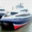

8


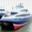

1


In [11]:
index = 1

input, _ = test_set[index]
display(transforms.functional.to_pil_image(input))
print(predict(model, input))

input, _ = attack_test_set[index]
display(transforms.functional.to_pil_image(input))
print(predict(model, input))

# input, _ = attack_test_set[index]
# display(transforms.functional.to_pil_image(input))
# print(predict(defense_model, input))

# input, _ = attack_test_set[index]
# display(transforms.functional.to_pil_image(input))
# print(predict(fgsm_reg_defense_model, input))